<a href="https://colab.research.google.com/github/darsana-r/corbeat/blob/main/DT%26RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Algorithms

In [1]:
from google.colab import files
uploaded=files.upload()



Saving heart.csv to heart.csv


Decision Tree

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


dataset=pd.read_csv('heart.csv')
dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
x=dataset.drop('target',axis=1)
y=dataset['target']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
print(x_train.shape)

(952, 11)


In [8]:
print(x_test.shape)


(238, 11)


In [9]:
print(y_test.shape)



(238,)


In [10]:
print(x_train.head())


      age  sex  chest pain type  resting bp s  cholesterol  \
1005   63    1                4           130          330   
224    33    1                3           120          298   
798    56    0                4           134          409   
816    77    1                4           125          304   
427    56    1                2           126          166   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1005                    1            2             132                1   
224                     0            0             185                0   
798                     0            2             150                1   
816                     0            2             162                1   
427                     0            1             140                0   

      oldpeak  ST slope  
1005      1.8         1  
224       0.0         1  
798       1.9         2  
816       0.0         1  
427       0.0         1  


In [13]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
y_pred=dt.predict(x_test)

In [15]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8991596638655462


In [16]:
print("classification report: ",classification_report(y_test,y_pred))

classification report:                precision    recall  f1-score   support

           0       0.86      0.93      0.89       107
           1       0.93      0.88      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

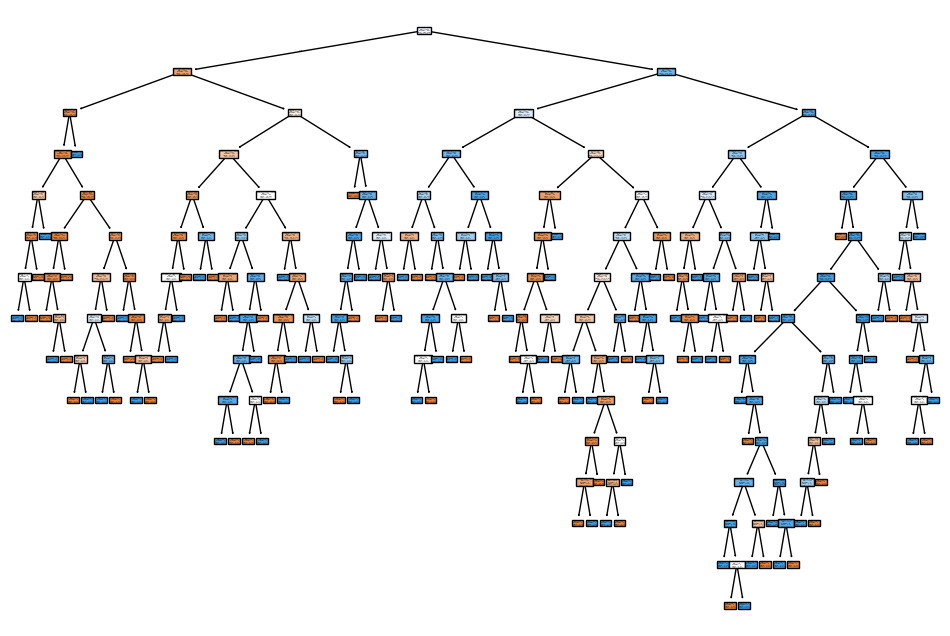

In [18]:
plt.figure(figsize=(12,8))
plot_tree(dt,filled=True,feature_names=x.columns,class_names=['class 0','class 1'])
plt.show()

Random Forest

In [20]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.945


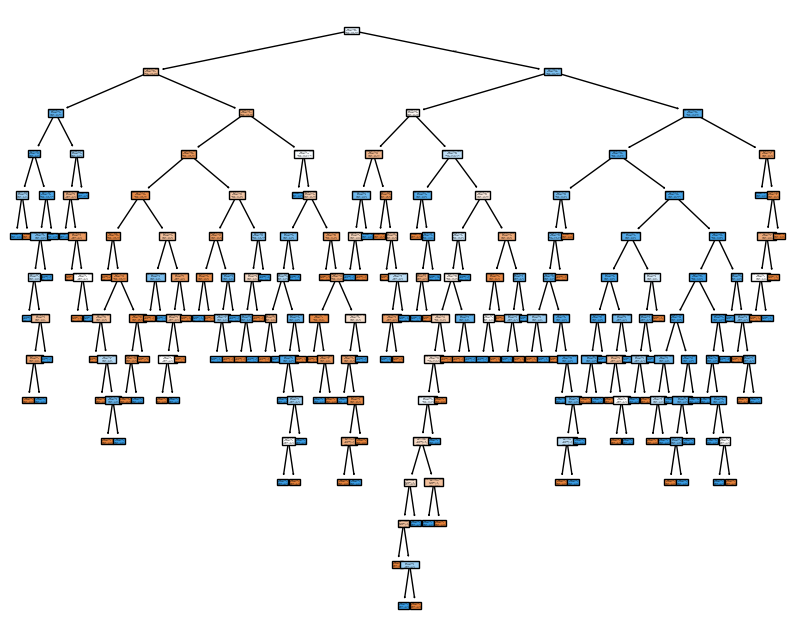

In [21]:
estimator=rf.estimators_[0]
plt.figure(figsize=(10,8))
plot_tree(estimator,filled=True,feature_names=x.columns,class_names=['class 0','class 1'])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

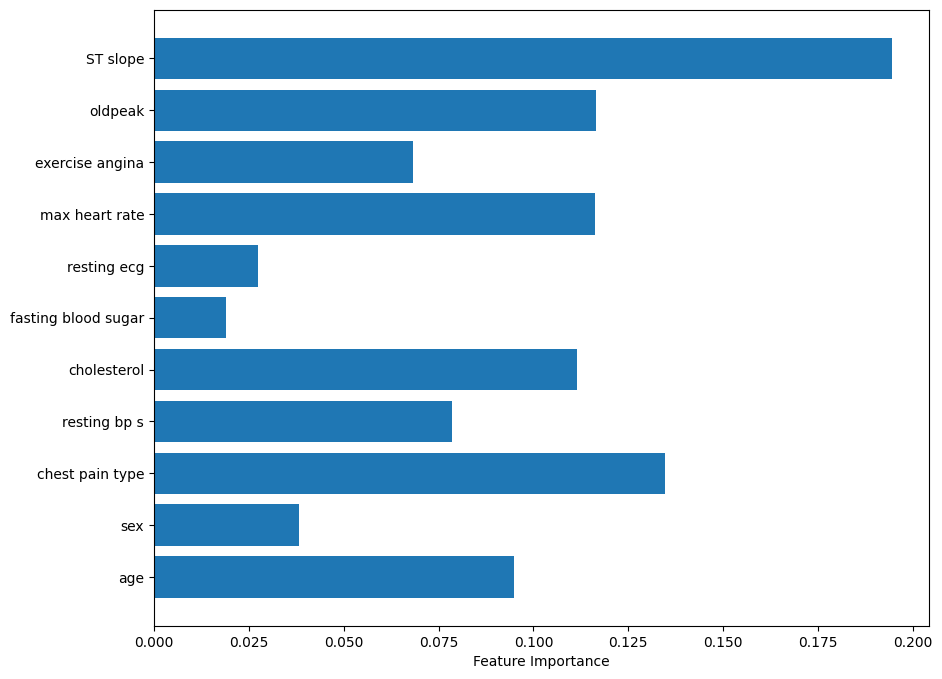

In [22]:
feature_importances=rf.feature_importances_
feature_names=x.columns
plt.figure(figsize=(10,8))
plt.barh(feature_names,feature_importances)
plt.xlabel('Feature Importance')
plt.ylable('Feature Names')
plt.title('Random Forest Feature Importances')
plt.show()